<a href="https://colab.research.google.com/github/sibot89/PyTorch/blob/main/Iris_classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD

In [54]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [55]:
X = iris.data
y = iris.target
num_samples, num_features = X.shape
num_classes = len(np.unique(y))
num_samples, num_features, num_classes

(150, 4, 3)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=42, shuffle=True, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, stratify=y_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((108, 4), (108,), (12, 4), (12,), (30, 4), (30,))

Standard Scaling

In [57]:
x_scaler = StandardScaler()
X_train  = x_scaler.fit_transform(X_train)
X_valid  = x_scaler.transform(X_valid)
X_test  = x_scaler.transform(X_test)
X_train.min(), X_train.max()

(np.float64(-2.2850990395573536), np.float64(2.9797691475827905))

In [58]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.int64)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(torch.Size([108, 4]),
 torch.Size([108]),
 torch.Size([12, 4]),
 torch.Size([12]),
 torch.Size([30, 4]),
 torch.Size([30]))

In [59]:
train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

In [60]:
train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=10)
test_loader = DataLoader(test_set, batch_size=10)

Model

In [99]:
model = nn.Linear(num_features, num_classes)

Loss:

In [89]:
loss_fn = nn.CrossEntropyLoss()

Optimizer:

In [100]:
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.5)

Train:

In [101]:
n_epochs = 200
loss_train_hist, acc_train_hist = [], []
loss_valid_hist, acc_valid_hist = [], []
best_loss_valid = float('inf')

In [102]:
for i in range(n_epochs):
  mean_loss_train, mean_loss_valid = 0, 0
  mean_acc_train, mean_acc_valid = 0, 0
  for x_batch , y_batch in train_loader:
    y_hat = model(x_batch)

    loss = loss_fn(y_hat, y_batch)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

  mean_loss_train = mean_loss_train/len(train_set)
  mean_acc_train = mean_acc_train/len(train_set)

  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)

  with torch.no_grad():
    for x_batch , y_batch in valid_loader:
      y_hat = model(x_batch)
      loss = loss_fn(y_hat, y_batch)
      mean_loss_valid += loss.item() * len(x_batch)
      mean_acc_valid += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

    mean_loss_valid = mean_loss_valid/len(valid_set)
    mean_acc_valid = mean_acc_valid/len(valid_set)

    loss_valid_hist.append(mean_loss_valid)
    acc_valid_hist.append(mean_acc_valid)

  # print(f"epoch: {i}  "
  #     f"TrainLoss: {mean_loss_train:.2}  "
  #     f"TrainAcc: {mean_acc_train:.2}  "
  #     f"ValidLoss: {mean_loss_valid:.2}  "
  #     f"ValidAcc: {mean_acc_valid:.2}")
  if mean_loss_valid < best_loss_valid:
    torch.save(model, "best-model.pt")
    best_loss_valid = mean_loss_valid
    print(f"Model Saved! best loss valid: {best_loss_valid}")
    print()

Model Saved! best loss valid: 1.0006930232048035

Model Saved! best loss valid: 0.8542433182398478

Model Saved! best loss valid: 0.7580352524916331

Model Saved! best loss valid: 0.6851481596628824

Model Saved! best loss valid: 0.6322878102461497

Model Saved! best loss valid: 0.5921137183904648

Model Saved! best loss valid: 0.5593923727671305

Model Saved! best loss valid: 0.5334769090016683

Model Saved! best loss valid: 0.5118722319602966

Model Saved! best loss valid: 0.49306242167949677

Model Saved! best loss valid: 0.4767149289449056

Model Saved! best loss valid: 0.46258048713207245

Model Saved! best loss valid: 0.4500833253065745

Model Saved! best loss valid: 0.4381774365901947

Model Saved! best loss valid: 0.42823047439257306

Model Saved! best loss valid: 0.4184509664773941

Model Saved! best loss valid: 0.4097289989391963

Model Saved! best loss valid: 0.401317132016023

Model Saved! best loss valid: 0.3934454495708148

Model Saved! best loss valid: 0.3863584424058596

In [103]:
loss_train_hist

[1.0678395452322784,
 0.9059853200559262,
 0.7892155371330403,
 0.7090908631130501,
 0.6521042828206662,
 0.6084795263078477,
 0.5758005579312643,
 0.5495995525960569,
 0.5295468077615455,
 0.5104404980385745,
 0.49585124022430843,
 0.482869119003967,
 0.47112965638990756,
 0.4616018699275123,
 0.4519856064407914,
 0.44369197278111067,
 0.43617106698177477,
 0.42962360354485335,
 0.4228110702501403,
 0.4172702199882931,
 0.411310536717927,
 0.40637913980969675,
 0.40125844103318675,
 0.396651315468329,
 0.39242947653487875,
 0.38869126361829265,
 0.38451365215910804,
 0.38069892591900295,
 0.3769252073985559,
 0.37340795745452243,
 0.3700254186987877,
 0.36699296727224634,
 0.36401251841474463,
 0.36106562283304,
 0.3579727438864885,
 0.3550021066157906,
 0.3524589657231613,
 0.34995517824535016,
 0.3472396963172489,
 0.34487609730826485,
 0.3423990274745005,
 0.3400179898297345,
 0.3376293706673163,
 0.3354473754211708,
 0.33327055474122363,
 0.33084975859081306,
 0.32893575976292294,

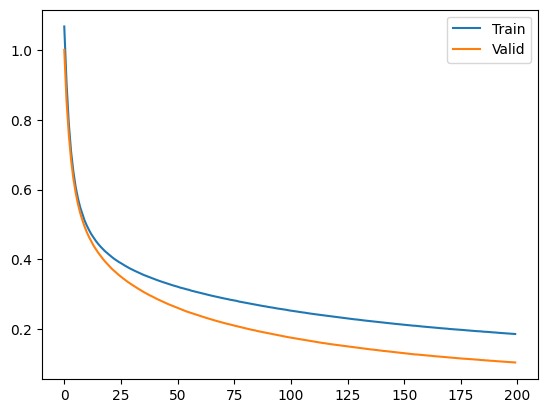

In [104]:
plt.plot(loss_train_hist)
plt.plot(loss_valid_hist)
plt.legend(['Train', 'Valid'])

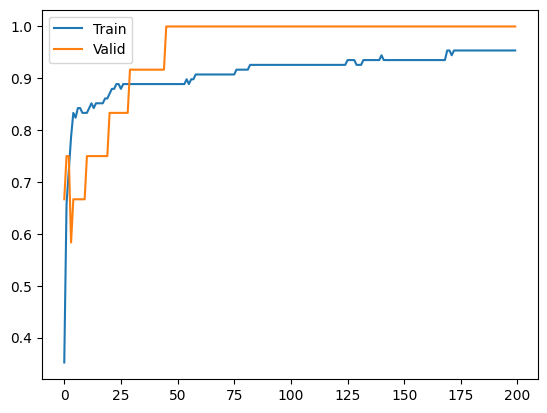

In [105]:
plt.plot(torch.arange(n_epochs), acc_train_hist)
plt.plot(torch.arange(n_epochs), acc_valid_hist)
plt.legend(['Train', 'Valid'])

Test:

In [106]:
model = torch.load("best_model.pt", weights_only=False)

In [107]:
mean_acc_test = 0
with torch.no_grad():
  for x_batch, y_batch in test_loader:
    y_hat = model(x_batch)
    mean_acc_test += torch.sum(y_hat.argmax(dim=1) == y_batch).item()

  mean_acc_test = mean_acc_test/len(test_set)
mean_acc_test

0.8333333333333334